In [1]:
##STEP 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

In [2]:
##STEP 2: Loading datafile
dataset=pd.read_csv('D:/MyDocs/NEU/Fall-20/ALY 6020/Final Project/kc_house_data.csv')
dataset.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### STEP 3: Data Computation
##datatype conversion
dataset['price']=dataset['price'].astype(np.int64)
dataset['bathrooms']=dataset['bathrooms'].astype(np.int64)
dataset['floors']=dataset['floors'].astype(np.int64)
dataset['date'] = pd.to_datetime(dataset['date'])

In [6]:
dataset.dtypes

id                        int64
date             datetime64[ns]
price                     int64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [7]:
dataset['house_age']=dataset['date'].dt.year - dataset['yr_built']

In [8]:
dataset['renovated']=dataset['yr_renovated'].apply(lambda yr: 0 if yr == 0 else 1)

In [9]:
# drop unwanted columns
dataset.pop('id')
dataset.pop('date')
dataset.pop('yr_built')
dataset.pop('yr_renovated')

0           0
1        1991
2           0
3           0
4           0
         ... 
21608       0
21609       0
21610       0
21611       0
21612       0
Name: yr_renovated, Length: 21613, dtype: int64

In [2]:
#STEP 4: Exploration Data Analysis

Text(0.5, 1.0, 'Distribution of Price')

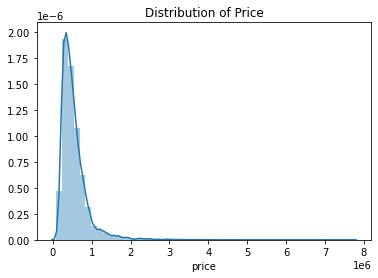

In [10]:
#Distribution of price
sns.distplot(dataset['price'])
plt.title("Distribution of Price")

In [11]:
dataset['price']=np.log(dataset['price'])

Text(0.5, 1.0, 'Distribution of log(Price)')

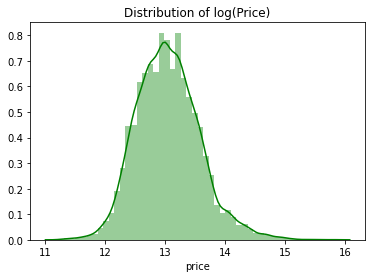

In [12]:
sns.distplot(dataset['price'],color='green')
plt.title("Distribution of log(Price)")

<AxesSubplot:title={'center':'House price vs Bathrooms'}, xlabel='bathrooms', ylabel='price'>

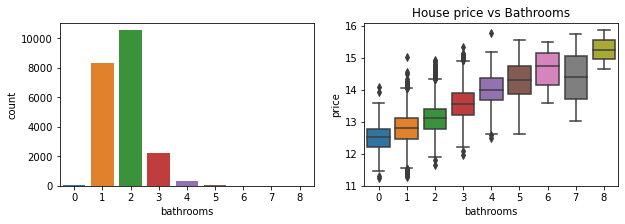

In [17]:
#Analyzing price with discrete features
#1.Bathrooms
fig,ax=plt.subplots(nrows=1, ncols=2,figsize=(10,3))
plt.title("House price vs Bathrooms")
sns.countplot(x='bathrooms',data=dataset, ax=ax[0])
sns.boxplot(x='bathrooms',y='price', data=dataset, ax=ax[1])

<AxesSubplot:title={'center':'House price vs Grade'}, xlabel='grade', ylabel='price'>

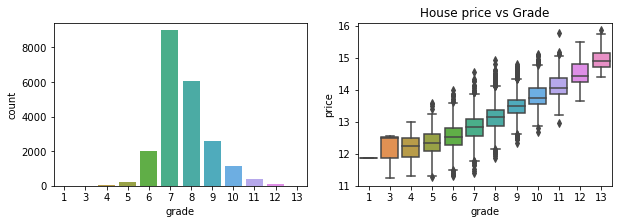

In [18]:
#2.Grade
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,3))
plt.title("House price vs Grade")
sns.countplot(x='grade',data=dataset, ax=ax[0])
sns.boxplot(x='grade', y='price', data=dataset, ax=ax[1])

<AxesSubplot:title={'center':'House price vs Bedrooms'}, xlabel='bedrooms', ylabel='price'>

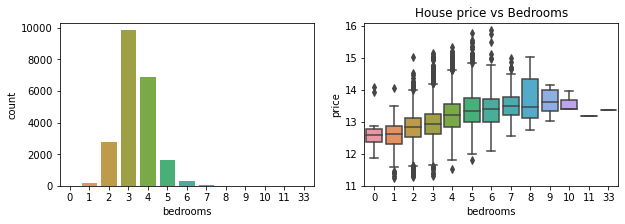

In [19]:
#3.Bedrooms

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,3))
plt.title("House price vs Bedrooms")
sns.countplot(x='bedrooms',data=dataset, ax=ax[0])
sns.boxplot(x='bedrooms', y='price', data=dataset,ax=ax[1])

<AxesSubplot:title={'center':'House price vs No of Floors'}, xlabel='floors', ylabel='price'>

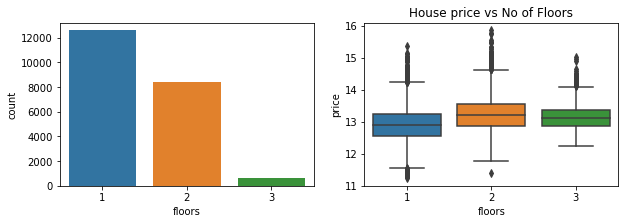

In [20]:
#4.Floors

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,3))
plt.title("House price vs No of Floors")
sns.countplot(x='floors',data=dataset, ax=ax[0])
sns.boxplot(x='floors', y='price', data=dataset, ax=ax[1])

<AxesSubplot:title={'center':'House price vs Waterfront'}, xlabel='waterfront', ylabel='price'>

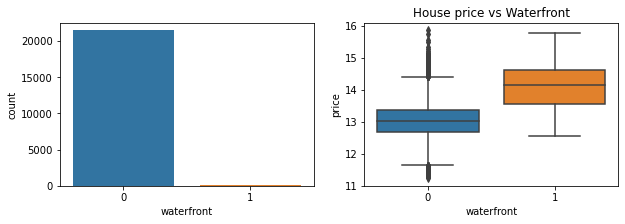

In [21]:
#5. Waterfront

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,3))
plt.title("House price vs Waterfront")
sns.countplot(x='waterfront',data=dataset, ax=ax[0])
sns.boxplot(x='waterfront', y='price', data=dataset, ax=ax[1])

<AxesSubplot:title={'center':'House price vs View'}, xlabel='view', ylabel='price'>

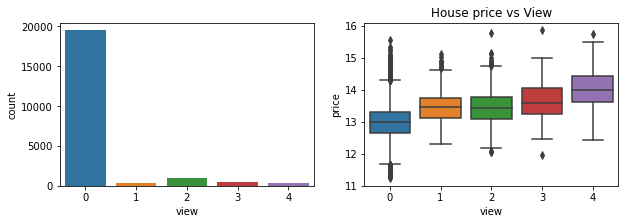

In [22]:
#6.View

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,3))
plt.title("House price vs View")
sns.countplot(x='view',data=dataset, ax=ax[0])
sns.boxplot(x='view', y='price', data=dataset, ax=ax[1])

<AxesSubplot:xlabel='long', ylabel='price'>

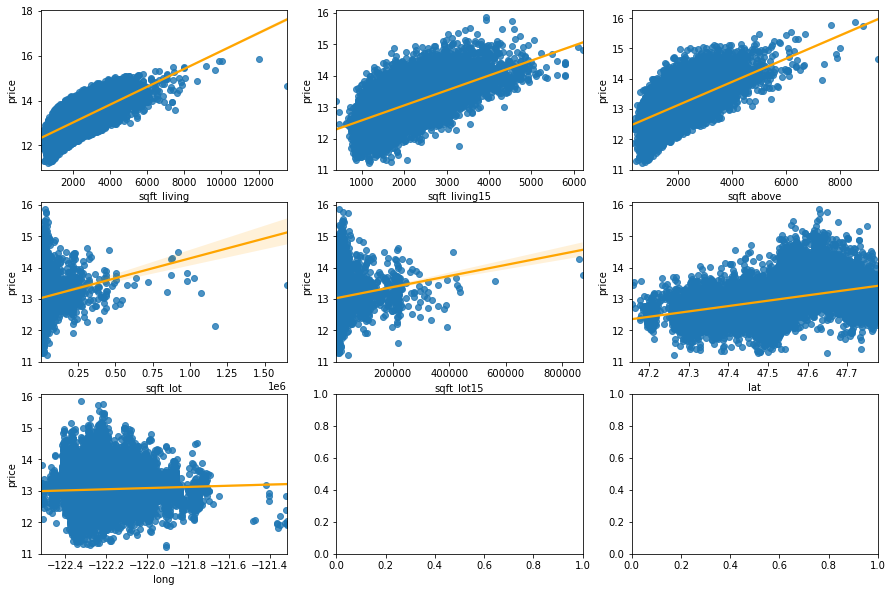

In [23]:
# Analyzing prize with continuous house features
#1.sqft_living
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(15,10))
sns.regplot(x='sqft_living', y='price',line_kws = {'color': 'orange'}, data=dataset,ax=ax[0,0])
sns.regplot(x='sqft_living15', y='price',line_kws = {'color': 'orange'}, data=dataset,ax=ax[0,1])
sns.regplot(x='sqft_above', y='price',line_kws = {'color': 'orange'}, data=dataset,ax=ax[0,2])
sns.regplot(x='sqft_lot', y='price',line_kws = {'color': 'orange'}, data=dataset,ax=ax[1,0])
sns.regplot(x='sqft_lot15', y='price',line_kws = {'color': 'orange'}, data=dataset,ax=ax[1,1])
sns.regplot(x='lat', y='price',line_kws = {'color': 'orange'}, data=dataset,ax=ax[1,2])
sns.regplot(x='long', y='price',line_kws = {'color': 'orange'}, data=dataset,ax=ax[2,0])

<AxesSubplot:>

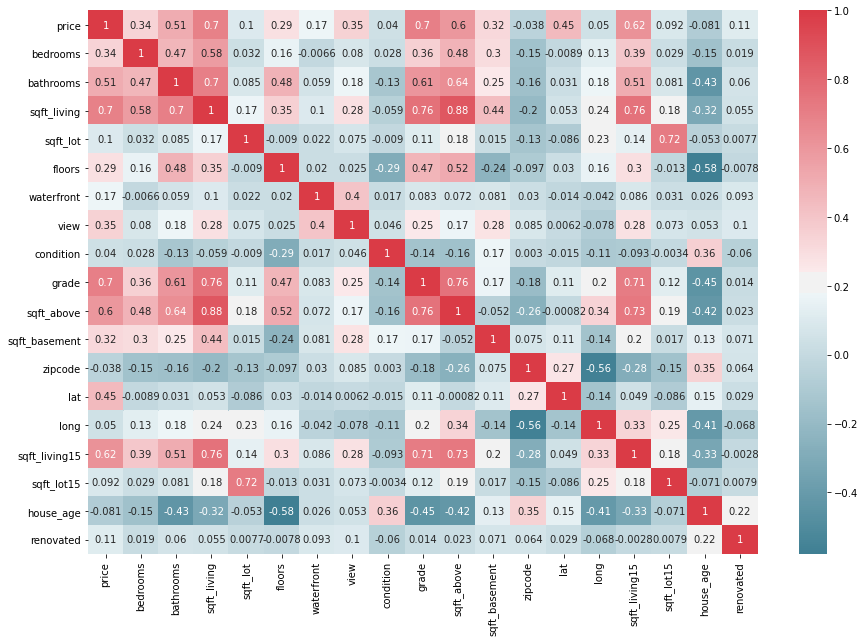

In [24]:
#Heatmap
plt.figure(figsize=(15,10))
colormap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(dataset.corr(),annot=True,cmap=colormap)

In [13]:
# Train and Test dataset
x=dataset.drop(columns=['price'])
y=dataset['price'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=100)

In [15]:
# Multiple Regression Model
LR = LinearRegression()
LR.fit(x_train, y_train)
LR_pred=LR.predict(x_test)
LR_RMSE=mean_squared_error(y_test,LR_pred,squared=False)
print("RMSE of Multiple Regression Model: {:^0.2f}".format(LR_RMSE))

RMSE of Multiple Regression Model: 0.25


In [ ]:
#GLM Model
#g_train=sm.add_constant(x_train)
#glm=sm.OLS(y_train,g_train)
#glm.fit()
#print(glm.fit().summary())

In [ ]:

# Finding optimal value of k value
param_grid={'n_neighbors': np.arange(1,25)}
grid=GridSearchCV(KNeighborsRegressor(),param_grid,cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)

In [16]:
#KNN Regression
knn=KNeighborsRegressor(n_neighbors=15)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
knn_RMSE=mean_squared_error(y_test,knn_pred,squared=False)
print("RMSE of KNN Model: {:^0.2f}".format(knn_RMSE))

RMSE of KNN Model: 0.36


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid={'max_depth': np.arange(3, 10)}
grid=GridSearchCV(DecisionTreeRegressor(), param_grid, cv=3)
grid.fit(x_train,y_train)
print("score for 3 fold cv:= %3.2f" %(grid.score(x_test,y_test)))
print("best fit parameters from gridSearch")
print(grid.best_params_)

In [17]:
# Decion Tree Regression

DT=DecisionTreeRegressor(max_depth=9)
DT.fit(x_train,y_train)
DT_pred=DT.predict(x_test)
DT_RMSE=mean_squared_error(y_test,DT_pred,squared=False)
print("RMSE of Decision Tree is:{:^0.2f}".format(DT_RMSE))

RMSE of Decision Tree is:0.22


<AxesSubplot:>

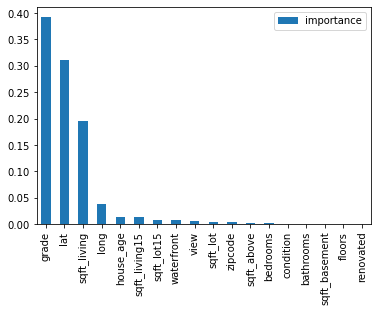

In [18]:
fi4=pd.DataFrame(DT.feature_importances_, index=x_train.columns,columns=['importance']).sort_values('importance',
                                                                        ascending=False)
fi4.plot(kind='bar')

In [19]:
# Random Forest Regression

RF=RandomForestRegressor(n_estimators=100)
RF.fit(x_train,y_train)
RF_pred=RF.predict(x_test)
RF_RMSE=mean_squared_error(y_test,RF_pred,squared=False)
print("RMSE of Random Forest is:{:^0.2f}".format(RF_RMSE))

RMSE of Random Forest is:0.18


<AxesSubplot:>

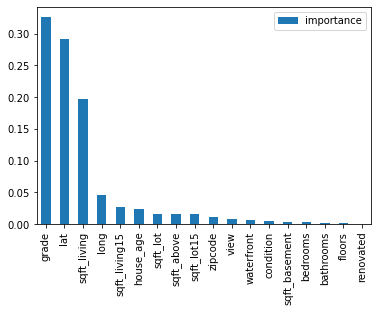

In [20]:
#Feature Importance by RF model
fi2=pd.DataFrame(RF.feature_importances_, index=x_train.columns,columns=['importance']).sort_values('importance',
                                                                        ascending=False)
fi2.plot(kind='bar')

In [21]:
#Gradient Bossting Regression

XGB=GradientBoostingRegressor(learning_rate=0.1, n_estimators=1000, subsample=1.0,max_depth=3)
XGB.fit(x_train,y_train)
XGB_pred=XGB.predict(x_test)
XGB_RMSE=mean_squared_error(y_test,XGB_pred,squared=False)
print("RMSE of Gradient Boost model is:{:^0.2f}".format(XGB_RMSE))

RMSE of Gradient Boost model is:0.16


<AxesSubplot:>

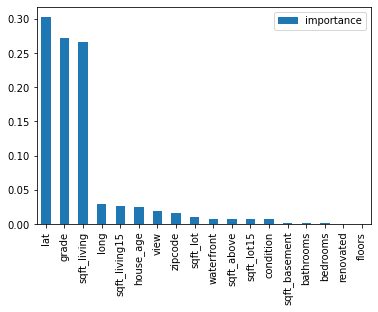

In [22]:
#Feature Importance by XGB model
fi3=pd.DataFrame(XGB.feature_importances_, index=x_train.columns,columns=['importance']).sort_values('importance',
                                                                        ascending=False)
fi3.plot(kind='bar')

In [26]:
sc=StandardScaler()
x_train_new=sc.fit_transform(x_train.values)
x_test_new=sc.fit_transform(x_test.values)

In [27]:
x_train1=pd.DataFrame(x_train_new,index=x_train.index,columns=x_train.columns)
x_test1=pd.DataFrame(x_test_new,index=x_test.index,columns=x_test.columns)

In [32]:
from sklearn.neural_network import MLPClassifier
NN =MLPRegressor(30,solver='sgd',activation='relu',learning_rate_init=0.01, max_iter=5000)
NN.fit(x_train1,y_train)
NN_pred=NN.predict(x_test1)
NN_RMSE=mean_squared_error(y_test,NN_pred,squared=False)
print("RMSE of Neural Network Classifier Model is: {:^0.2f}".format(NN_RMSE))

RMSE of Neural Network Classifier Model is: 0.24
